In [128]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

In [129]:
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [130]:
log_reg_full = LogisticRegression(max_iter=10000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

In [131]:
n_labeled = 50
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.7481108312342569

In [132]:
np.random.seed(42)
random_indices = np.random.choice(len(X_train), size=200, replace=False)
X_train_random = X_train[random_indices]
y_train_random = y_train[random_indices]

In [133]:
log_reg_random = LogisticRegression(max_iter=10000)
log_reg_random.fit(X_train_random, y_train_random)
log_reg_random.score(X_test, y_test)

0.8639798488664987

In [134]:
dbscan = DBSCAN(eps=18, min_samples=5)
labels = dbscan.fit_predict(X_train)

In [135]:
representative_digits_idx = []
unique_labels = np.unique(labels)
for label in unique_labels:
    cluster_mask = (labels == label)
    cluster_indices = np.where(cluster_mask)[0]
    representative_digits_idx.append(cluster_indices[np.argmax(y_train[cluster_indices])])

X_representative_digits = X_train[representative_digits_idx]

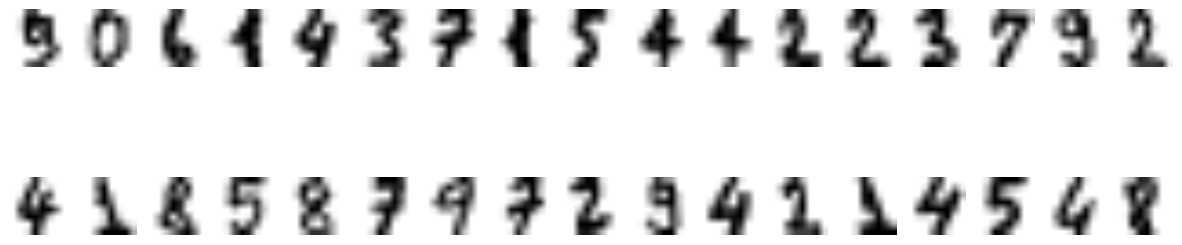

In [136]:
plt.figure(figsize=(15, 4))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(2, len(unique_labels) // 2, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap='binary', interpolation="bilinear")
    plt.axis("off")
plt.show()

In [137]:
y_representative_digits = y_train[representative_digits_idx]

In [138]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.7531486146095718

In [139]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i, label in enumerate(unique_labels):
    y_train_propagated[labels == label] = y_representative_digits[i]

In [140]:
log_reg_propagated = LogisticRegression(max_iter=10000)
log_reg_propagated.fit(X_train, y_train_propagated)
log_reg_propagated.score(X_test, y_test)

0.4508816120906801